# Predicting heart disease from clinincal and laboratorial data using knn

# Introduction

***Importations:***

In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
%matplotlib inline

***Loading the dataset***

In [8]:
url = 'https://drive.google.com/file/d/1WPC2nrHRzS2CWvxE_BsFIJfpwXqsMcTi/view?usp=sharing'
path = 'https://drive.google.com/uc?import=download&id='+url.split('/')[-2]

In [9]:
data  = pd.read_csv(path)

In [11]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


***Shape***

In [13]:
data.shape

(303, 14)

***Variables type***

In [14]:
data.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

# EDA and Pre-Processing

# Outcome Variable Count

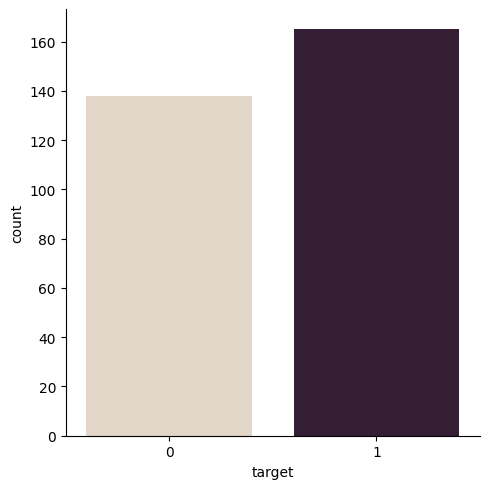

In [17]:
sns.catplot(x='target', kind='count', palette = 'ch:.25', data = data)

# Categorical Predictive Variable

***Sex:***

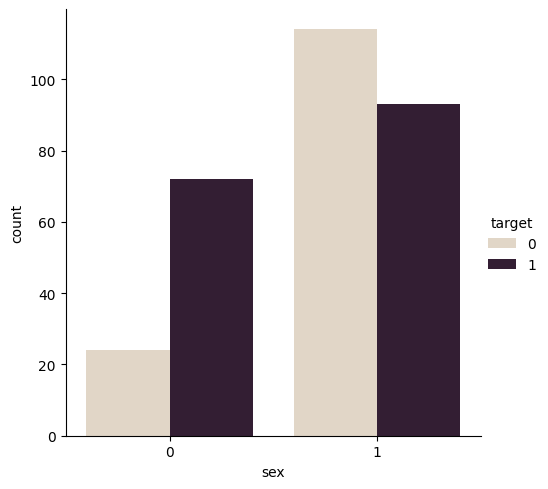

In [18]:
sns.catplot(x='sex', kind='count', hue='target', data=data, palette='ch:.25')

***cp:***

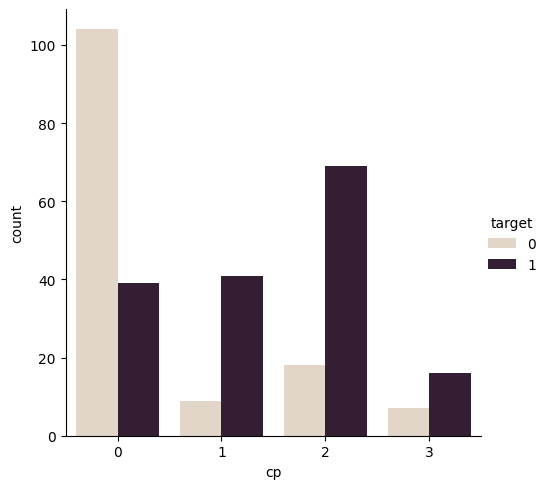

In [26]:
sns.catplot(x='cp', kind='count', hue = 'target', data=data, palette='ch:.25')

***fbs:***

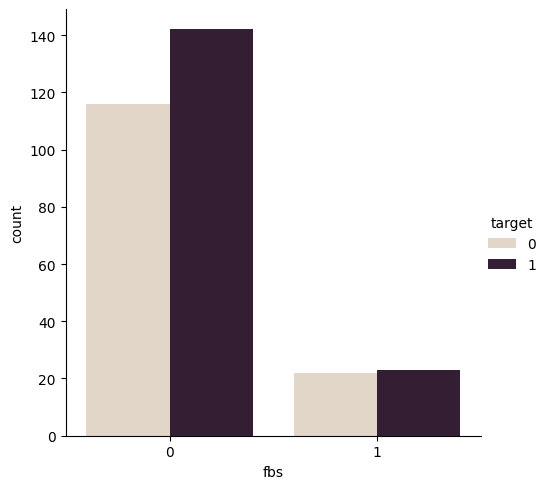

In [20]:
sns.catplot(x='fbs', kind='count', hue='target', data=data, palette='ch:.25')

***restecg:***

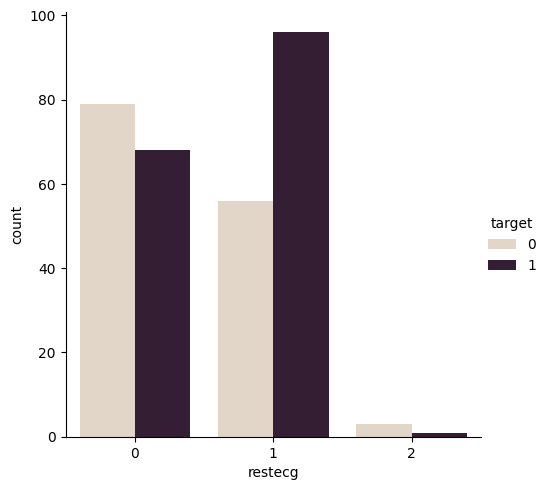

In [21]:
sns.catplot(x='restecg', kind='count', hue='target', data=data, palette= 'ch:.25')

***exang***

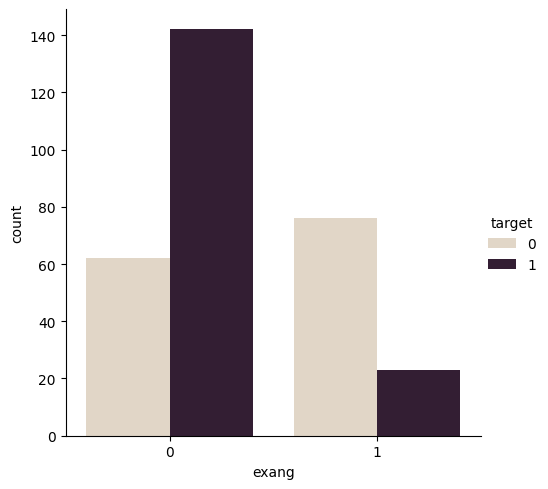

In [22]:
sns.catplot(x='exang', kind='count', hue='target', data=data, palette='ch:.25')

***slope***

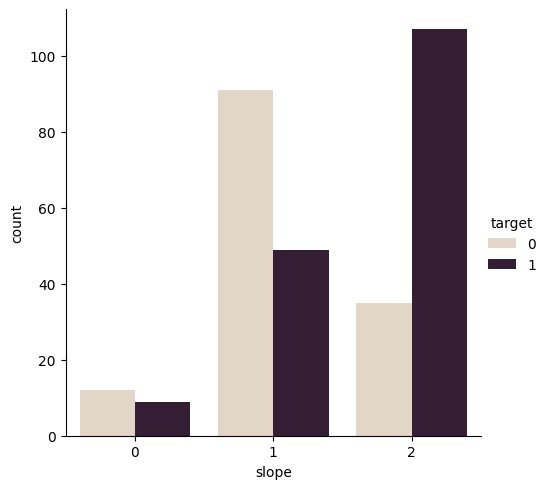

In [25]:
sns.catplot(x='slope', kind='count', hue='target', data=data, palette='ch:.25')

***ca:***

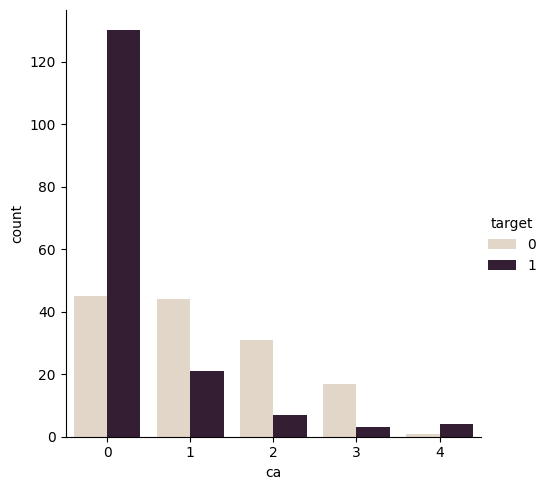

In [28]:
sns.catplot(x='ca', kind='count', hue='target', data=data, palette='ch:.25')

***thal:***

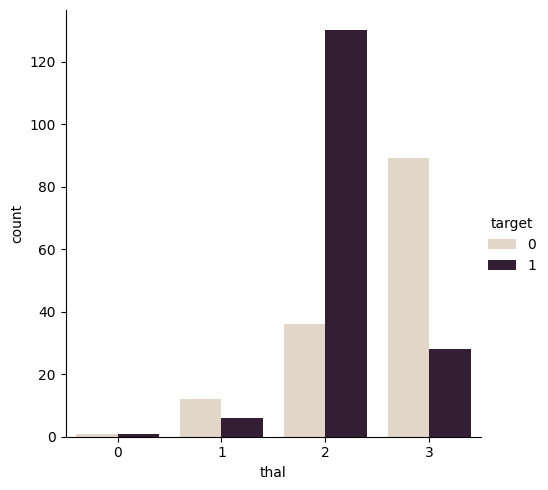

In [29]:
sns.catplot(x='thal', kind='count', hue='target', data=data, palette='ch:.25')

# Distributional predictive variables:

In [30]:
data[['age','trestbps','chol','thalach','oldpeak']].describe()

,age,trestbps,chol,thalach,oldpeak
count,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,131.623762,246.264026,149.646865,1.039604
std,9.082101,17.538143,51.830751,22.905161,1.161075
min,29.000000,94.000000,126.000000,71.000000,0.000000
25%,47.500000,120.000000,211.000000,133.500000,0.000000
50%,55.000000,130.000000,240.000000,153.000000,0.800000
75%,61.000000,140.000000,274.500000,166.000000,1.600000
max,77.000000,200.000000,564.000000,202.000000,6.200000


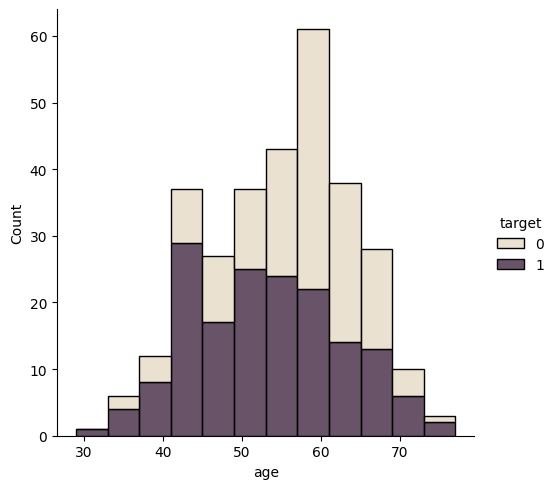

In [31]:
sns.displot(x='age', multiple='stack', hue='target', data=data, palette='ch:.25')

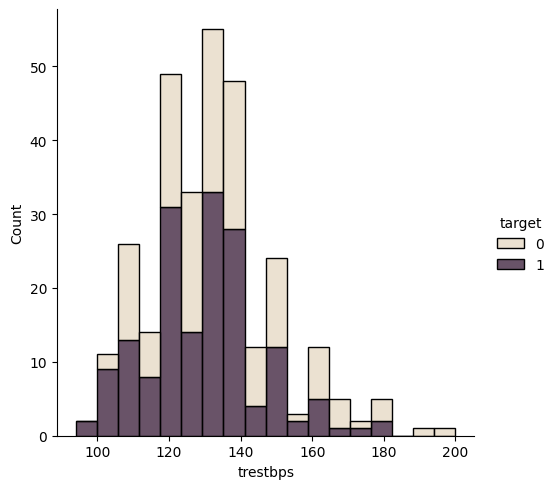

In [32]:
sns.displot(x='trestbps', multiple='stack', hue='target', data=data, palette='ch:.25')

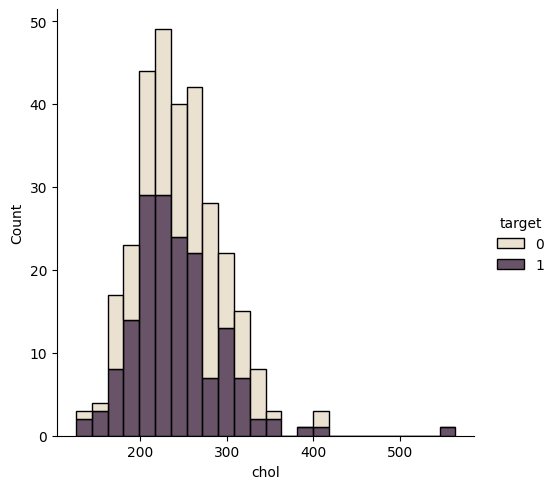

In [38]:
sns.displot(x='chol', multiple='stack', hue='target', data=data, palette='ch:.25')

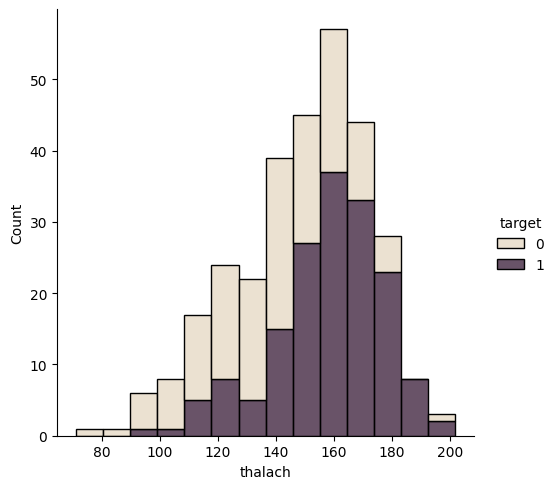

In [39]:
sns.displot(x='thalach', multiple='stack', hue='target', data=data, palette = 'ch:.25')

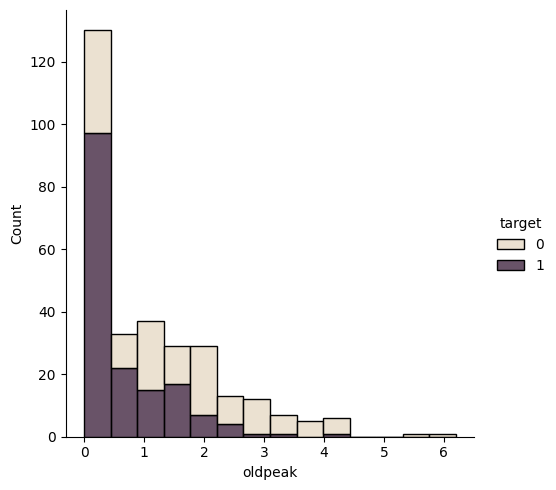

In [40]:
sns.displot(x='oldpeak', multiple='stack', hue = 'target', data=data, palette='ch:.25')

# Splitting and pre-processing

defining x_train,x_test,y_train,y_test

In [46]:
x = data.drop('target', axis=1)
y = data['target']
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2, random_state = 42 )

scaling the data

In [48]:
sc = StandardScaler().fit(x_train)
x_train = sc.transform(x_train)
x_test = sc.transform(x_test)

# Training the model

parameters for grid search

In [58]:
knn = KNeighborsClassifier()
parameters = {'n_neighbors': [3,5,7,9,11], 'weights': ['uniform', 'distance']}

Fitting training data and grid searching:

In [59]:
grid = GridSearchCV(knn, parameters, cv=4, scoring='accuracy')
grid.fit(x_train,y_train)

GridSearchCV(cv=4, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [3, 5, 7, 9, 11],
                         'weights': ['uniform', 'distance']},
             scoring='accuracy')

Displaying best parameters:

In [60]:
print(grid.best_params_)

{'n_neighbors': 5, 'weights': 'uniform'}


picking thew best model:

In [61]:
model = grid.best_estimator_

# Evaluating the model

Model score on test data:

In [62]:
model.score(x_test, y_test)

0.9016393442622951

Confusion matrix

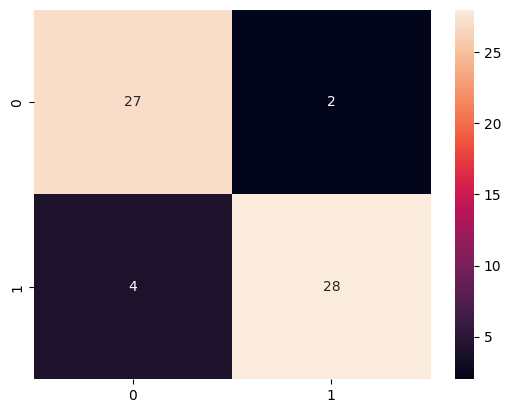

In [63]:
predictions = model.predict(x_test)
cm = metrics.confusion_matrix(y_test, predictions)
cm = pd.DataFrame(cm)
sns.heatmap(cm, annot = True)
plt.show()

Calculating sensivity, specifity, PPV, NPV

In [ ]:
from sklearn.model_selection import GridSearchCV

In [69]:
TP = 28
FP = 2
TN = 27
FN = 4
sensitivity = TP /(TP+FN)*100
specificity = TN/(TN+FP)*100
ppv = TP/(TP+FP)*100
npv = TN/(TN+FN)*100

PRINTING SENSITIVITY, SPECIFICITY, PPV, NPV

In [70]:
print('SENSITIVITY:', sensitivity,'%', 'SPECIFICTIVITY:', specificity, '%', 'PPV:', ppv,'%', 'npv:',npv,'%')

SENSITIVITY: 87.5 % SPECIFICTIVITY: 93.10344827586206 % PPV: 93.33333333333333 % npv: 87.09677419354838 %


AUC score:

In [71]:
probs = model.predict_proba(x_test)[:, 1]
auc = metrics.roc_auc_score(y_test,probs)
print(auc)

0.9154094827586208


ROC Curve

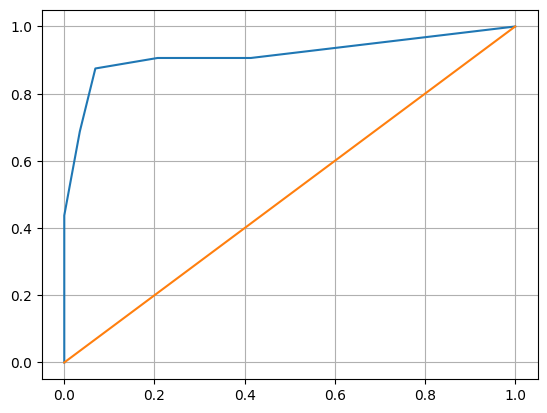

In [74]:
fpr, tpr, _ = metrics.roc_curve(y_test, probs)
plt.figure()
plt.grid()
plt.plot(fpr, tpr)
plt.plot([0,1], [0,1])
plt.show()